In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from collections import Counter
import string
import nltk
nltk.download('words')
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [2]:
df = pd.read_csv("Final_Dataset.csv")
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
2,risk,a colleague and i are researching the differin...,0
3,request book information,earlier this morning i was on the phone with a...,0
4,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0


In [3]:
df.isnull().sum()

,0
subject,0
message,0
label,0


<Axes: >

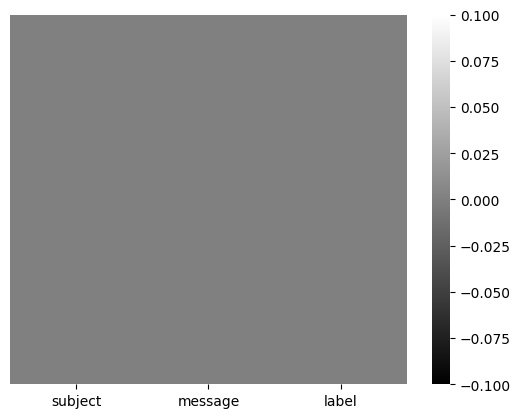

In [4]:
sns.heatmap(df.isnull(),cmap='gist_gray',yticklabels=False)

In [5]:
df['sub_mssg']=df['subject']+" "+df['message']
df.head()

,subject,message,label,sub_mssg
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research center conten...
1,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...
2,risk,a colleague and i are researching the differin...,0,risk a colleague and i are researching the dif...
3,request book information,earlier this morning i was on the phone with a...,0,request book information earlier this morning ...
4,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,call for abstracts : optimality in syntactic t...


In [6]:
df.drop('subject',axis=1,inplace=True)

In [7]:
df.head()

,message,label,sub_mssg
0,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research center conten...
1,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...
2,a colleague and i are researching the differin...,0,risk a colleague and i are researching the dif...
3,earlier this morning i was on the phone with a...,0,request book information earlier this morning ...
4,content - length : 4437 call for papers is the...,0,call for abstracts : optimality in syntactic t...


In [8]:
df.drop('message',axis=1,inplace=True)

In [9]:
df.head()

,label,sub_mssg
0,0,job posting - apple-iss research center conten...
1,0,query : letter frequencies for text identifica...
2,0,risk a colleague and i are researching the dif...
3,0,request book information earlier this morning ...
4,0,call for abstracts : optimality in syntactic t...


In [10]:
import re

In [11]:
df['sub_mssg'][5]

'm . a . in scandinavian linguistics m . a . in scandinavian linguistics at the university of tromsoe 1995-1996 ( corrected version ) the linguistics section of the institute for language and literature at the university of tromsoe  norway  offers a one year course leading up to a master of arts degree  starting the fall of 1995 . the course is designed to prepare students for research in generative syntax and phonology with special attention to the scandinavian languages . the course is open to students from all countries with a background in linguistics corresponding roughly to a b . a . with a major in linguistics  or a norwegian cand . mag . the course is equivalent to 60 e . c . t . s credits . instruction will be in english . proficiency in a scandinavian language is not required  nor is previous knowledge of scandinavian grammar . those who wish may follow a course in norwegian for foreigners during the whole year . students pay no tuition  only a nominal registration fee . a li

In [12]:
#REPLACING NUMBERS
df['sub_mssg']=df['sub_mssg'].str.replace(r'\d+(\.\d+)?', 'numbers')
df['sub_mssg'][5]

'm . a . in scandinavian linguistics m . a . in scandinavian linguistics at the university of tromsoe 1995-1996 ( corrected version ) the linguistics section of the institute for language and literature at the university of tromsoe  norway  offers a one year course leading up to a master of arts degree  starting the fall of 1995 . the course is designed to prepare students for research in generative syntax and phonology with special attention to the scandinavian languages . the course is open to students from all countries with a background in linguistics corresponding roughly to a b . a . with a major in linguistics  or a norwegian cand . mag . the course is equivalent to 60 e . c . t . s credits . instruction will be in english . proficiency in a scandinavian language is not required  nor is previous knowledge of scandinavian grammar . those who wish may follow a course in norwegian for foreigners during the whole year . students pay no tuition  only a nominal registration fee . a li

In [13]:
#CONVRTING EVERYTHING TO LOWERCASE
df['sub_mssg']=df['sub_mssg'].str.lower()
#REPLACING NEXT LINES BY 'WHITE SPACE'
df['sub_mssg']=df['sub_mssg'].str.replace(r'\n'," ")
# REPLACING EMAIL IDs BY 'MAILID'
df['sub_mssg']=df['sub_mssg'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID')
# REPLACING URLs  BY 'Links'
df['sub_mssg']=df['sub_mssg'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links')
# REPLACING CURRENCY SIGNS BY 'MONEY'
df['sub_mssg']=df['sub_mssg'].str.replace(r'£|\$', 'Money')
# REPLACING LARGE WHITE SPACE BY SINGLE WHITE SPACE
df['sub_mssg']=df['sub_mssg'].str.replace(r'\s+', ' ')

# REPLACING LEADING AND TRAILING WHITE SPACE BY SINGLE WHITE SPACE
df['sub_mssg']=df['sub_mssg'].str.replace(r'^\s+|\s+?$', '')
#REPLACING CONTACT NUMBERS
df['sub_mssg']=df['sub_mssg'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','contact number')
#REPLACING SPECIAL CHARACTERS  BY WHITE SPACE
df['sub_mssg']=df['sub_mssg'].str.replace(r"[^a-zA-Z0-9]+", " ")

In [14]:
df['sub_mssg'][0]

"job posting - apple-iss research center content - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore  located in singapore  is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics  including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models  cache language models  and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics  including natural language parsing  lexical database design  and statistical language 

In [ ]:
# import spacy
# nlp = spacy.load("en_core_websm")

# doc = nlp("Mando talked for 3 hours although talking isn't his thing")
# doc = nlp("eating eats eat ate adjustable rafting ability meeting better")
# for token in doc:
#     print(token, " | ", token.lemma)

In [15]:
len(df['sub_mssg'])

4196

In [16]:
len(df['sub_mssg'][1])

1476

In [17]:
df['sub_mssg'][1]

"query : letter frequencies for text identification i am posting this inquiry for sergei atamas ( satamas @ umabnet . ab . umd . edu )  a research associate at the university of maryland at baltimore . his field is molecular biology  and his work involves comparing dna strings using various algorithms . i do n't understand the details well enough to pass them along . at any rate  one such algorithm relies upon frequencies with which the letters g  a  t  and c occur in the dna strings . he would like to explore the analogous use of letter ( sound ) frequencies in natural language texts . hence this posting . specifically  sergei wonders if any linguist subscribers could help steer him to recent literature concerning text identification based on letter frequencies . any suggestions could be sent directly to him at the above address  or to me and i ' ll pass them along . he would also be interested in collaborative work if this research connects with the work of any linguists or text proc

In [18]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
# sm = ""
# temp = str(df['sub_mssg'][1])
# doc = nlp(temp)
# for token in doc:
#   sm = sm + token.lemma_ + " "

In [19]:
words = set(nltk.corpus.words.words())

In [ ]:
# sent = "Io andiamo to the beach with my amico."
# temp = " ".join(w for w in nltk.wordpunct_tokenize(sent) if w.lower() in words or not w.isalpha())
# temp

In [20]:
sm = ""
uniqueWords = {"call"}
for i in range(len(df['sub_mssg'])):
  sm = ""
  temp = str(df['sub_mssg'][i])
  temp = " ".join(w for w in nltk.wordpunct_tokenize(temp) if w.lower() in words or not w.isalpha())
  doc = nlp(temp)
  for token in doc:
    sm = sm + token.lemma_ + " "
    uniqueWords.add(token.lemma_)

  df['sub_mssg'][i] = sm

In [ ]:
# sm


# len(sm)


# if sm != df['sub_mssg'][1]:
#   print("ho gayaaaa")
# else:
#   print("lg gaye")



# sm = ""

# for i in range(len(df['sub_mssg'])):
#   sm= ""
#   temp = str(df['sub_mssg'][i])
#   doc = nlp(temp)
#   for token in doc:
#     sm = sm + token.lemma_ + " "


#   df['sub_mssg'][i] = sm
# sm = ""
# temp = str(df['sub_mssg'][0])
# doc = nlp(temp)
# for token in doc:
#   sm = sm + token.lemma_ + " "
# len(sm)

In [21]:
len(df['sub_mssg'][7])

945

In [22]:
len(uniqueWords)

29044

In [23]:
df.head()

,label,sub_mssg
0,0,job post - apple - research center content - l...
1,0,query : letter for text identification I be po...
2,0,risk a colleague and I be the of risk by our h...
3,0,request book information this morning I be on ...
4,0,call for : in syntactic theory content - lengt...


In [24]:
df.to_csv("Updated.csv",index=False)

In [ ]:
# file = open('geek.txt', 'r')
# # This will print every line one by one in the file
# for each in file:
#     print (each)

In [25]:
file = open("unique words.txt","w")

In [26]:
for i in uniqueWords:
  file.write(i+" ")

In [27]:
if '' in uniqueWords:
  print("YEs")
else:
  print("no")

no


In [28]:
df['sub_mssg']

,sub_mssg
0,job post - apple - research center content - l...
1,query : letter for text identification I be po...
2,risk a colleague and I be the of risk by our h...
3,request book information this morning I be on ...
4,call for : in syntactic theory content - lengt...
...,...
4191,streamlined denizen ajar heavens stolid pinch ...
4192,penny stock be about time nomad international ...
4193,anomaly from 3881 crack poliomyelitis axisymme...
4194,slutty to meet you take that ! ' -


In [29]:
t = df['sub_mssg'][0].split(' ')
type(t)

list

In [32]:
l = []
for i in range(len(df['sub_mssg'])):
  temp = df['sub_mssg'][i].split(' ')
  l.append(temp)

In [33]:
l = np.array(l)
l.shape

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4196,) + inhomogeneous part.

In [34]:
import csv
with open("updated final dataset.txt","w") as file:
  wrt = csv.writer(file)
  wrt.writerows(l)